## <font color='navy'> Cancer death-rate dataset

The dataset consists deathrates due to cancer across different counties in US. It has 3047 records and 34 variables related to residents'age,education,marital status, employment,average mortality, income, birthrate etc. TARGET_deathRate variable is our dependent variable. The more information about dataset can be found at: https://data.world/nrippner/ols-regression-challenge.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
cancer = pd.read_csv('cancer_reg.csv',engine = 'python')
# OR c = pd.read_csv('cancer_reg.csv',encoding = "ISO-8859-1")

In [5]:
cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

#### The dataset has 32 numerical variables and 2 categorical variables.

#### **The above result shows that dataset contains null values in 3 features. However, it is not in the range of 5-10% missing values. So we will be randomly assigning null values later on.**

In [7]:
cancer.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [8]:
cancer.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [9]:
cancer.shape

(3047, 34)

## Data Preprocessing

### Assigning null values

Randomly choosing 8 columns for assignment

In [10]:
random.seed(4)
vec = []
for i in range(8):
    r = random.randint(0,33)
    if r not in vec: vec.append(r)
vec        

[15, 19, 6, 25, 30, 9, 5, 4]

In [11]:
cancer.iloc[:,vec]

,PctNoHS18_24,PctHS25_Over,povertyPercent,PctEmpPrivCoverage,PctAsian,MedianAge,popEst2015,medIncome
0,11.5,23.2,11.2,41.6,4.821857,39.3,260131,61898
1,6.1,26.0,18.6,43.6,2.246233,33.0,43269,48127
2,24.0,29.0,14.6,34.9,0.465898,45.0,21026,49348
3,20.2,31.6,17.1,35.0,1.161359,42.8,75882,44243
4,14.9,33.4,12.5,35.1,0.665830,48.3,10321,49955
...,...,...,...,...,...,...,...,...
3042,20.9,32.2,12.4,44.6,0.327613,44.2,6343,46961
3043,26.7,23.1,18.8,48.6,4.044920,30.4,37118,48609
3044,19.7,23.0,15.0,47.8,1.316472,30.9,34536,51144
3045,10.9,36.1,13.3,49.6,0.244632,39.0,25609,50745


In [12]:
for col in cancer.iloc[:,vec].columns:
    cancer.loc[cancer.sample(frac=0.1).index, col] = pd.np.nan

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [13]:
cancer.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                   305
popEst2015                  305
povertyPercent              305
studyPerCap                   0
binnedInc                     0
MedianAge                   305
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                305
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                305
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage          305
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                    305
PctOther

### Now the dataset hase more than 5% null values.

In [14]:
cancer.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,2742.000000,2.742000e+03,2742.000000,3047.000000,2742.000000,3047.000000,...,2438.000000,2742.000000,3047.000000,3047.000000,3047.000000,3047.000000,2742.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47077.817651,1.013507e+05,16.916922,155.399415,45.752334,39.570725,...,48.453774,41.160576,36.252642,19.240072,83.645286,9.107978,1.256476,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12097.623774,3.334958e+05,6.428015,529.628366,47.699623,5.226017,...,10.083006,9.410362,7.841741,6.113041,16.380025,14.534538,2.628747,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.290000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38847.250000,1.154575e+04,12.200000,0.000000,37.700000,36.350000,...,41.000000,34.400000,30.900000,14.850000,77.296180,0.620675,0.257396,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45201.000000,2.578150e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.553391,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52522.750000,6.693600e+04,20.500000,83.650776,43.900000,42.500000,...,55.600000,47.600000,41.550000,23.100000,95.451693,10.509732,1.220677,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.000000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [15]:
cancer.median()

avgAnnCount                  171.000000
avgDeathsPerYear              61.000000
TARGET_deathRate             178.100000
incidenceRate                453.549422
medIncome                  45201.000000
popEst2015                 25781.500000
povertyPercent                15.900000
studyPerCap                    0.000000
MedianAge                     41.000000
MedianAgeMale                 39.600000
MedianAgeFemale               42.400000
AvgHouseholdSize               2.500000
PercentMarried                52.400000
PctNoHS18_24                  17.100000
PctHS18_24                    34.700000
PctSomeCol18_24               40.400000
PctBachDeg18_24                5.400000
PctHS25_Over                  35.200000
PctBachDeg25_Over             12.300000
PctEmployed16_Over            54.500000
PctUnemployed16_Over           7.600000
PctPrivateCoverage            65.100000
PctPrivateCoverageAlone       48.700000
PctEmpPrivCoverage            41.100000
PctPublicCoverage             36.300000


**Now, we assigned median values of their respective columns to the null values of a column, which had relatively low proportion of missing values.**

In [16]:
cancer['medIncome'].fillna((cancer['medIncome'].median()), inplace=True)

In [17]:
cancer['popEst2015'].fillna((cancer['popEst2015'].median()), inplace=True)

In [18]:
cancer['povertyPercent'].fillna((cancer['povertyPercent'].median()), inplace=True)

In [19]:
cancer['MedianAge'].fillna((cancer['MedianAge'].median()), inplace=True)

In [20]:
cancer['PctNoHS18_24'].fillna((cancer['PctNoHS18_24'].median()), inplace=True)

In [21]:
cancer['PctHS25_Over'].fillna((cancer['PctHS25_Over'].median()), inplace=True)

In [22]:
cancer['PctEmployed16_Over'].fillna((cancer['PctEmployed16_Over'].median()), inplace=True)

In [23]:
cancer['PctPrivateCoverageAlone'].fillna((cancer['PctPrivateCoverageAlone'].median()), inplace=True)

In [24]:
cancer['PctEmpPrivCoverage'].fillna((cancer['PctEmpPrivCoverage'].median()), inplace=True)

In [25]:
cancer['PctAsian'].fillna((cancer['PctAsian'].median()), inplace=True)

In [26]:
cancer.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over            0
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone       0
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

#### Since 'PctSomeCol18_24' column has 2285 null values out of 3047, we will not consider it as a variable in regression. 

In [27]:
cancer.drop(['PctSomeCol18_24'], axis=1, inplace=True)

In [28]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

**The dataset has 0 null values now.
Column 'binnedInc' is categorical variable. For regression purpose, we will have to replace it with dummy variables.**

In [29]:
cancer.binnedInc.value_counts()

(45201, 48021.6]      306
(54545.6, 61494.5]    306
[22640, 34218.1]      306
(51046.4, 54545.6]    305
(42724.4, 45201]      305
(48021.6, 51046.4]    305
(40362.7, 42724.4]    304
(34218.1, 37413.8]    304
(37413.8, 40362.7]    304
(61494.5, 125635]     302
Name: binnedInc, dtype: int64

In [30]:
cancer['binnedInc']= cancer['binnedInc'].map({'[22640, 34218.1]':'first' , '(34218.1, 37413.8]':'second', '(37413.8, 40362.7]':'third', '(40362.7, 42724.4]':'fourth', '(42724.4, 45201]':'fifth', '(45201, 48021.6]':'sixth', '(48021.6, 51046.4]':'seventh','(51046.4, 54545.6]':'eighth','(54545.6, 61494.5]':'ninth','(61494.5, 125635]':'tenth'})

In [31]:
binnedInc_dummies = pd.get_dummies(cancer.binnedInc, prefix = 'binnedInc' )

In [32]:
binnedInc_dummies

,binnedInc_eighth,binnedInc_fifth,binnedInc_first,binnedInc_fourth,binnedInc_ninth,binnedInc_second,binnedInc_seventh,binnedInc_sixth,binnedInc_tenth,binnedInc_third
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3042,0,0,0,0,0,0,0,1,0,0
3043,0,0,0,0,0,0,1,0,0,0
3044,1,0,0,0,0,0,0,0,0,0
3045,0,0,0,0,0,0,1,0,0,0


In [33]:
cancer = pd.concat([cancer,binnedInc_dummies],axis=1)

In [34]:
cancer.drop(['binnedInc'],axis=1,inplace=True)
cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,binnedInc_eighth,binnedInc_fifth,binnedInc_first,binnedInc_fourth,binnedInc_ninth,binnedInc_second,binnedInc_seventh,binnedInc_sixth,binnedInc_tenth,binnedInc_third
0,1397.0,469,164.9,489.8,61898.0,260131.0,11.2,499.748204,39.3,36.9,...,0,0,0,0,0,0,0,0,1,0
1,173.0,70,161.3,411.6,48127.0,43269.0,18.6,23.111234,33.0,32.2,...,0,0,0,0,0,0,1,0,0,0
2,102.0,50,174.7,349.7,49348.0,21026.0,14.6,47.560164,45.0,44.0,...,0,0,0,0,0,0,1,0,0,0
3,427.0,202,194.8,430.4,44243.0,75882.0,17.1,342.637253,42.8,42.2,...,0,1,0,0,0,0,0,0,0,0
4,57.0,26,144.4,350.1,49955.0,10321.0,12.5,0.000000,48.3,47.8,...,0,0,0,0,0,0,1,0,0,0


In [35]:
cancer.Geography.describe()

count                          3047
unique                         3047
top       Lake County, South Dakota
freq                              1
Name: Geography, dtype: object

#### Since the Geography is unique for each record, we will not consider it for building a model.

In [36]:
cancer.drop(['Geography'],axis=1,inplace=True)

#### Checking for duplicate records in the dataset.

In [37]:
cancer[cancer.duplicated()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,binnedInc_eighth,binnedInc_fifth,binnedInc_first,binnedInc_fourth,binnedInc_ninth,binnedInc_second,binnedInc_seventh,binnedInc_sixth,binnedInc_tenth,binnedInc_third


#### All records are unique.

In [38]:
cancer.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'binnedInc_eighth',
       'binnedInc_fifth', 'binnedInc_first', 'binnedInc_fourth',
       'binnedInc_ninth', 'binnedInc_second', 'binnedInc_seventh',
       'binnedInc_sixth', 'binnedInc_tenth', 'binnedInc_third'],
      dtype='object')

In [39]:
cancer = cancer[['TARGET_deathRate','avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'binnedInc_eighth',
       'binnedInc_fifth', 'binnedInc_first', 'binnedInc_fourth',
       'binnedInc_ninth', 'binnedInc_second', 'binnedInc_seventh',
       'binnedInc_sixth', 'binnedInc_tenth', 'binnedInc_third']]

### Checking for correlation.

In [40]:
corrMatrix = cancer.corr()

In [41]:
corrMatrix

,TARGET_deathRate,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,binnedInc_eighth,binnedInc_fifth,binnedInc_first,binnedInc_fourth,binnedInc_ninth,binnedInc_second,binnedInc_seventh,binnedInc_sixth,binnedInc_tenth,binnedInc_third
TARGET_deathRate,1.000000,-0.143532,-0.090715,0.449432,-0.411107,-0.108985,0.406369,-0.022285,0.005194,-0.021929,...,-0.109272,0.002560,0.289451,0.062892,-0.157303,0.167661,-0.095656,-0.022085,-0.234286,0.095326
avgAnnCount,-0.143532,1.000000,0.939408,0.073553,0.246929,0.892557,-0.129312,0.082071,-0.023166,-0.124969,...,0.053749,-0.010100,-0.112168,-0.049642,0.098178,-0.099645,0.012505,0.003923,0.180468,-0.076791
avgDeathsPerYear,-0.090715,0.939408,1.000000,0.062690,0.201865,0.933232,-0.065843,0.063488,-0.023378,-0.148487,...,0.030720,-0.004455,-0.085518,-0.034645,0.083066,-0.075129,-0.012955,-0.010861,0.167796,-0.057507
incidenceRate,0.449432,0.073553,0.062690,1.000000,-0.006136,0.025301,0.008198,0.077283,0.018099,-0.014733,...,0.032271,0.000987,-0.009419,0.013489,-0.017389,-0.026057,0.009540,0.023442,-0.013328,-0.013627
medIncome,-0.411107,0.246929,0.201865,-0.006136,1.000000,0.185917,-0.704704,0.040185,-0.019463,-0.097673,...,0.144184,-0.082716,-0.423313,-0.144343,0.272232,-0.291927,0.064370,-0.013153,0.687527,-0.210550
popEst2015,-0.108985,0.892557,0.933232,0.025301,0.185917,1.000000,-0.055424,0.051279,-0.021152,-0.165726,...,0.033171,-0.013326,-0.071349,-0.036387,0.089311,-0.066083,-0.010056,-0.020081,0.152374,-0.057136
povertyPercent,0.406369,-0.129312,-0.065843,0.008198,-0.704704,-0.055424,1.000000,-0.056172,-0.024692,-0.195466,...,-0.205397,-0.016877,0.582514,0.078001,-0.270373,0.294029,-0.152714,-0.073862,-0.389258,0.152648
studyPerCap,-0.022285,0.082071,0.063488,0.077283,0.040185,0.051279,-0.056172,1.000000,-0.025774,-0.036647,...,0.047827,0.002087,-0.028829,0.002819,0.021655,-0.057535,0.036373,0.019090,-0.007919,-0.035752
MedianAge,0.005194,-0.023166,-0.023378,0.018099,-0.019463,-0.021152,-0.024692,-0.025774,1.000000,0.116730,...,-0.021631,-0.005841,-0.009540,-0.000116,0.004710,0.029042,-0.009858,0.000129,0.006691,0.006501
MedianAgeMale,-0.021929,-0.124969,-0.148487,-0.014733,-0.097673,-0.165726,-0.195466,-0.036647,0.116730,1.000000,...,-0.010437,0.053455,-0.025608,0.007691,-0.027447,0.035566,0.023215,-0.001179,-0.111774,0.056251


plotting target column against one of the potential feature.

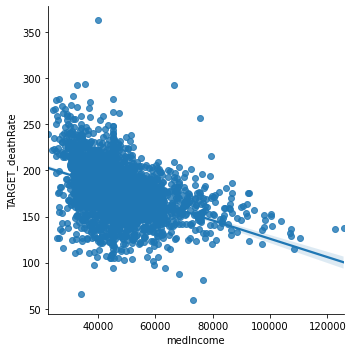

In [42]:
vis1 = sns.lmplot(x ='medIncome' , y='TARGET_deathRate', data = cancer)

**Plotting histogram and boxplot of target variable, to check the distribution.**

<AxesSubplot:xlabel='TARGET_deathRate'>

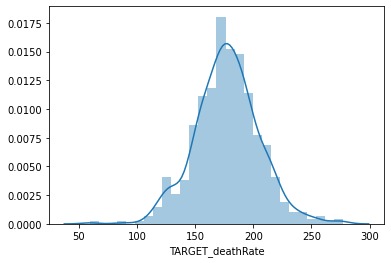

In [43]:
sns.distplot(cancer.TARGET_deathRate.sample(600))

<AxesSubplot:ylabel='TARGET_deathRate'>

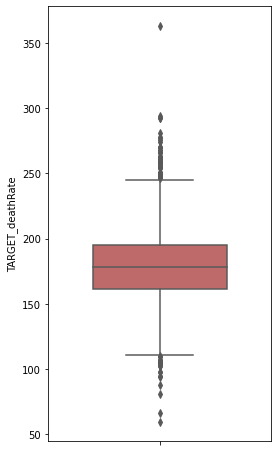

In [44]:
fig, ax = plt.subplots(figsize=(4,8)) 
sns.boxplot(y="TARGET_deathRate", data=cancer ,color = 'indianred', width =0.6)

In [45]:
cancer.columns

Index(['TARGET_deathRate', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'binnedInc_eighth',
       'binnedInc_fifth', 'binnedInc_first', 'binnedInc_fourth',
       'binnedInc_ninth', 'binnedInc_second', 'binnedInc_seventh',
       'binnedInc_sixth', 'binnedInc_tenth', 'binnedInc_third'],
      dtype='object')

### Plotting correlation matrix to better undestand the correlation among features.

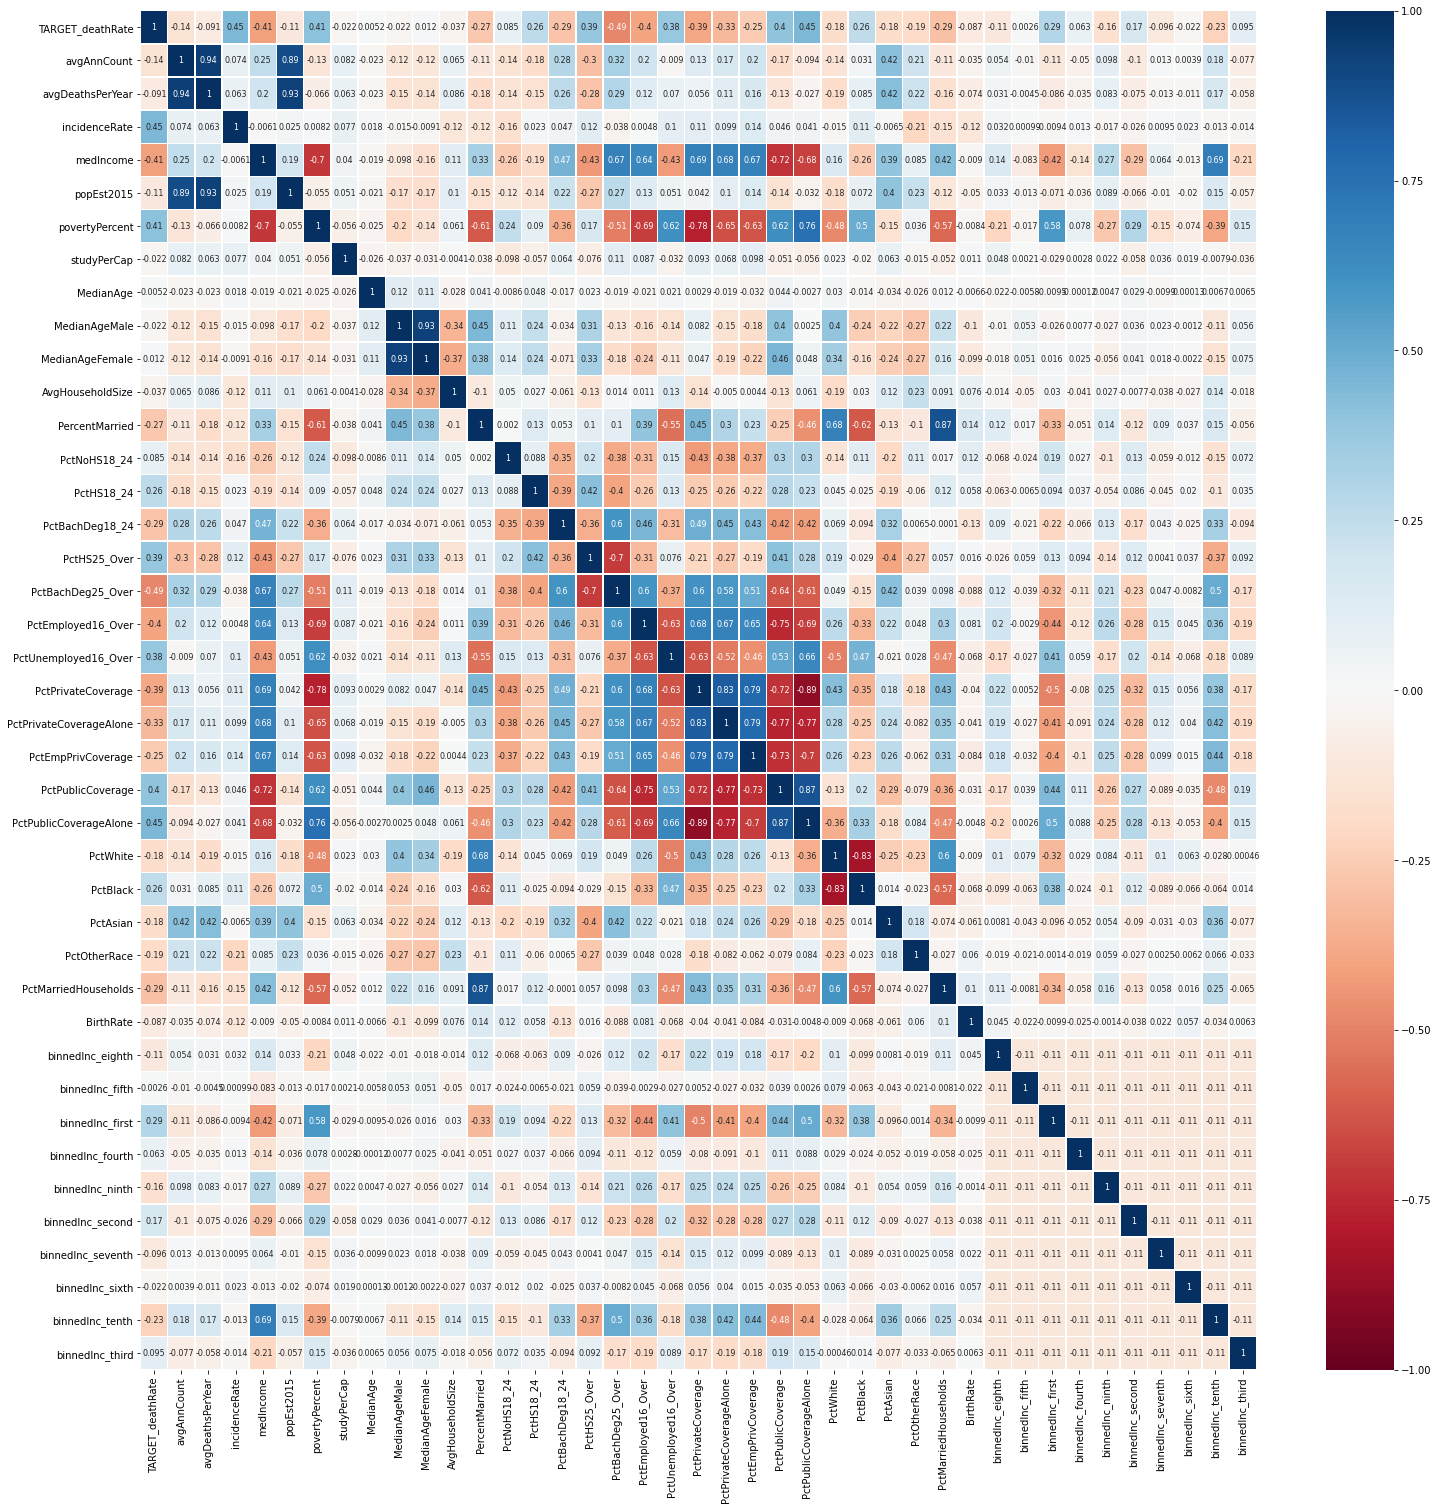

In [46]:
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(cancer.corr(),linewidths = 0.5, cmap="RdBu",xticklabels=1,yticklabels=1,
            center=0,vmax=1, vmin = -1,annot=True,annot_kws={"size": 8})
plt.show()

**Now we will drop the variables having high correlation as seen from the above results.**

In [47]:
cancer = cancer.drop(['avgAnnCount','popEst2015','povertyPercent','MedianAgeFemale',
                     'PctPublicCoverage', 'PctPublicCoverageAlone','PercentMarried'],axis=1)

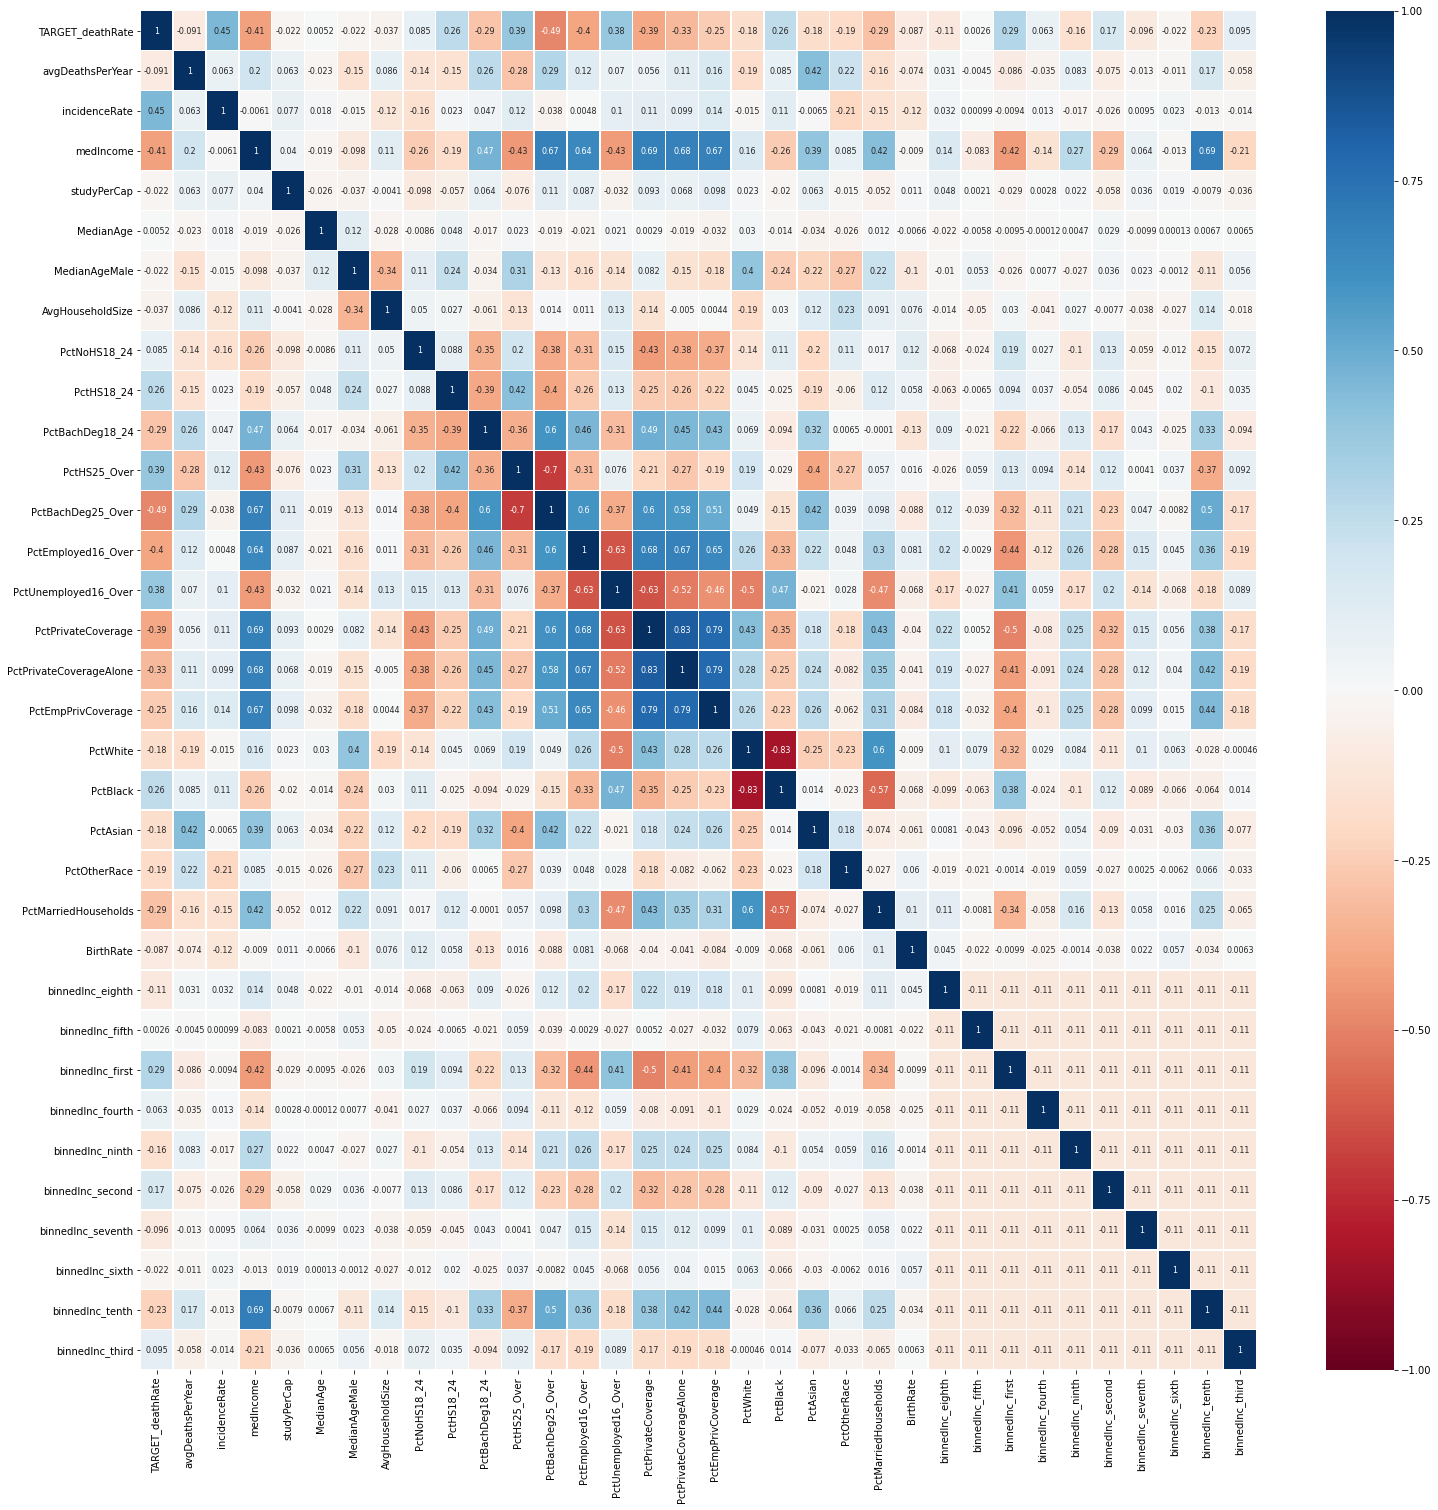

In [48]:
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(cancer.corr(),linewidths = 0.5, cmap="RdBu",xticklabels=1,yticklabels=1,
            center=0,vmax=1, vmin = -1,annot=True,annot_kws={"size": 8})
plt.show()

 **Replotting the correlation matrix, we can see that now there isn't high correlation present.**

In [49]:
cancer.columns

Index(['TARGET_deathRate', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'studyPerCap', 'MedianAge', 'MedianAgeMale', 'AvgHouseholdSize',
       'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'binnedInc_eighth',
       'binnedInc_fifth', 'binnedInc_first', 'binnedInc_fourth',
       'binnedInc_ninth', 'binnedInc_second', 'binnedInc_seventh',
       'binnedInc_sixth', 'binnedInc_tenth', 'binnedInc_third'],
      dtype='object')

In [50]:
cancer.shape

(3047, 34)

#### We created boxplot of each numerical variable for outlier detection and better understanding distribution.

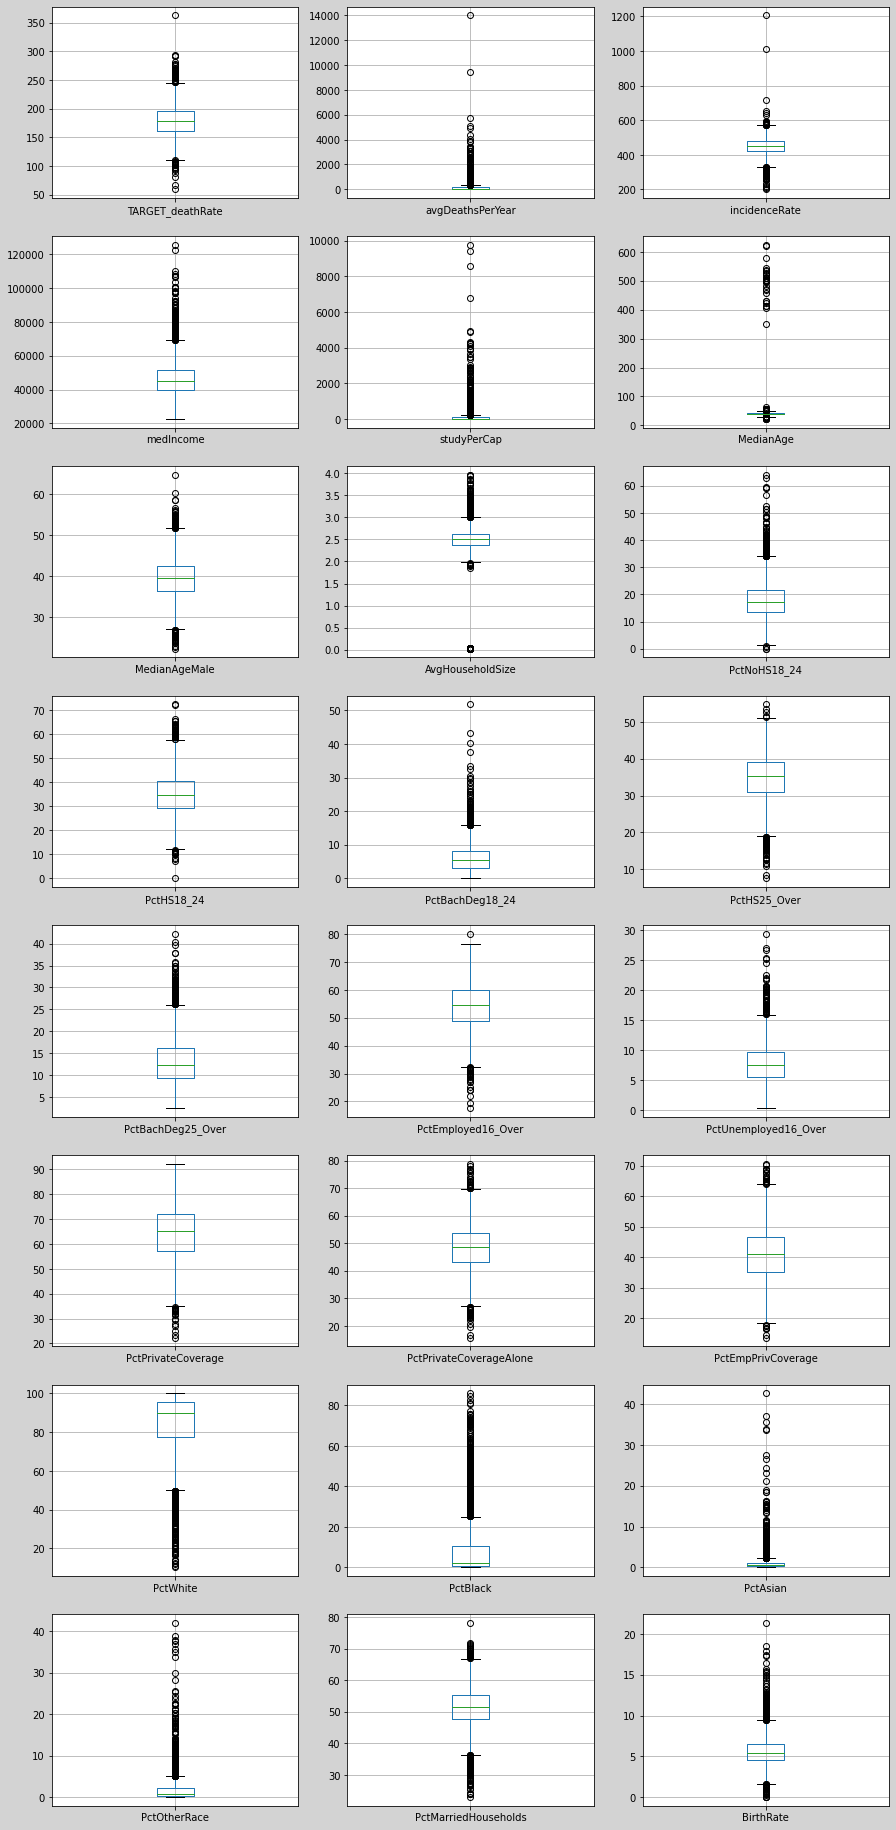

In [51]:
plt.figure(figsize=(15,50),facecolor = 'lightgray')
for i,col in enumerate(['TARGET_deathRate', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'studyPerCap', 'MedianAge', 'MedianAgeMale', 'AvgHouseholdSize',
       'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],start=1):
    plt.subplot(12, 3, i)
    cancer.boxplot(col,grid=True)
    

**As can be seen from the above figure, there are many outliers widely spread in the dataset. This can affect the model.
Therefore, we create the following function to remove the outliers according to IQR.** 

In [52]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

**Now, removing some obvious outliers from the dataset. For example, Column MedianAge has some outliers above 300 years, which is not possible. So, we will remove such outliers.**

In [53]:
cancer = remove_outlier(cancer, 'avgDeathsPerYear')
cancer.shape

(2698, 34)

In [54]:
cancer = remove_outlier(cancer, 'TARGET_deathRate')
cancer.shape

(2647, 34)

In [55]:
cancer = remove_outlier(cancer, 'MedianAge')
cancer.shape

(2476, 34)

In [56]:
cancer = remove_outlier(cancer, 'medIncome')
cancer.shape

(2390, 34)

#### Replotting boxplot,

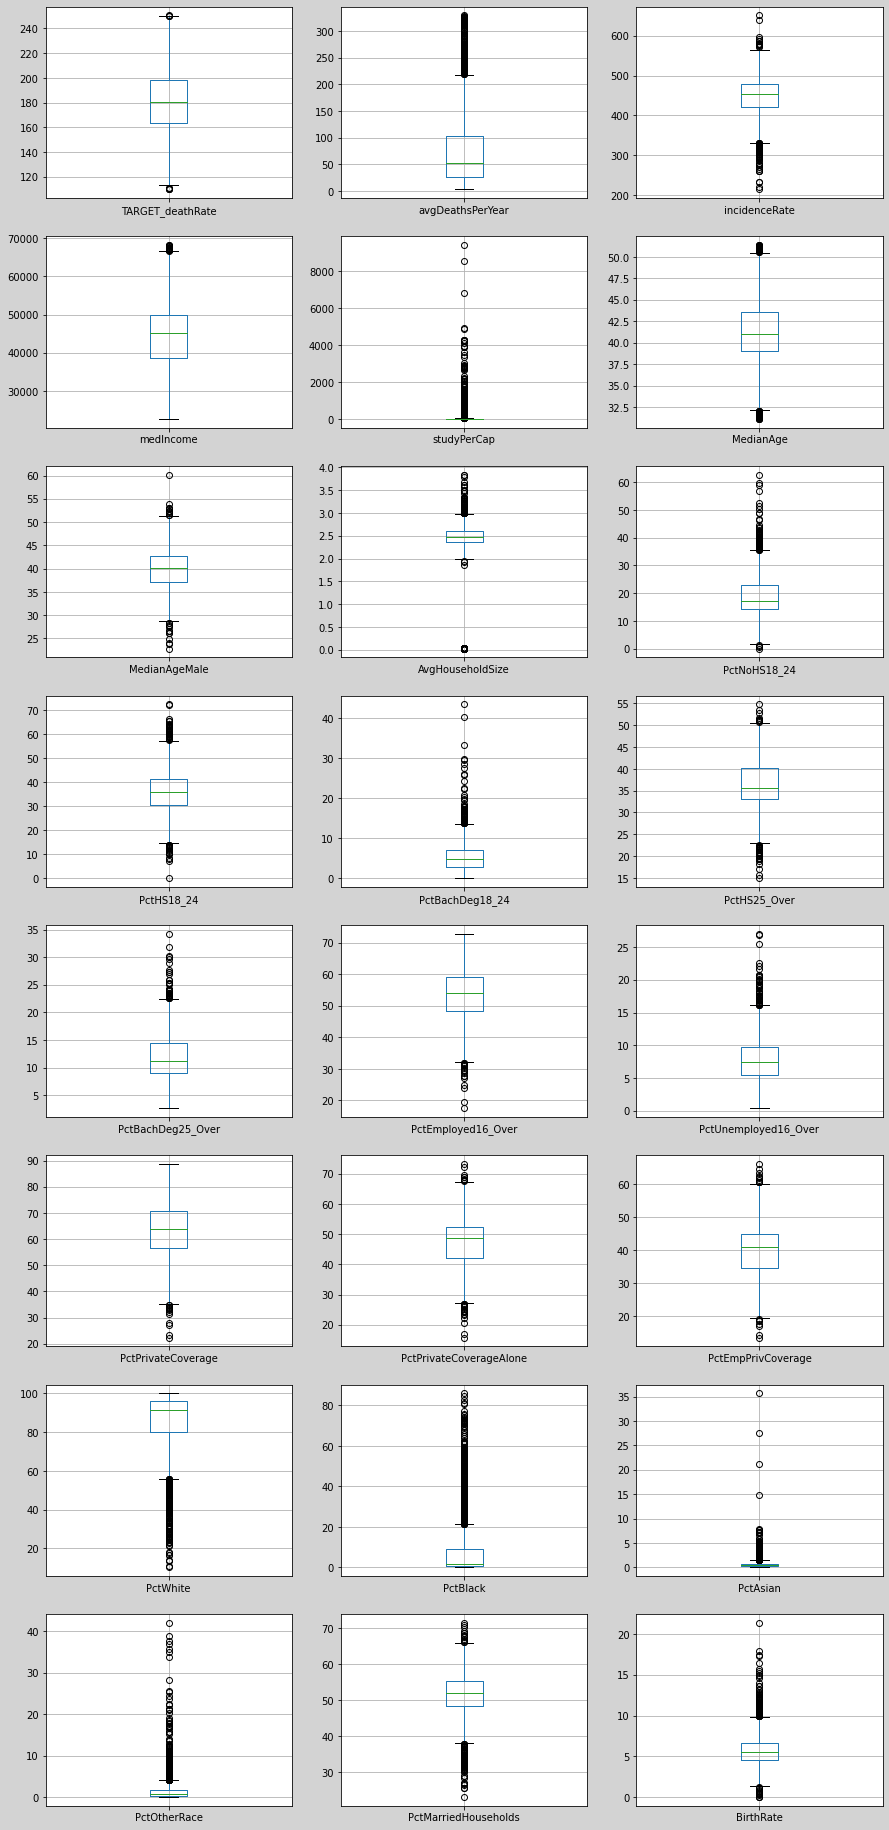

In [57]:
plt.figure(figsize=(15,50),facecolor = 'lightgray')
for i,col in enumerate(['TARGET_deathRate', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'studyPerCap', 'MedianAge', 'MedianAgeMale', 'AvgHouseholdSize',
       'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],start=1):
    plt.subplot(12, 3, i)
    cancer.boxplot(col,grid=True)
    

**We can see that variables now have less variance than before.**

In [58]:
cancer.describe()

,TARGET_deathRate,avgDeathsPerYear,incidenceRate,medIncome,studyPerCap,MedianAge,MedianAgeMale,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,...,binnedInc_eighth,binnedInc_fifth,binnedInc_first,binnedInc_fourth,binnedInc_ninth,binnedInc_second,binnedInc_seventh,binnedInc_sixth,binnedInc_tenth,binnedInc_third
count,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,...,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000
mean,180.958159,76.494142,447.188536,44641.661506,136.857987,41.331464,40.053640,2.457386,18.795607,36.078243,...,0.104603,0.105021,0.111297,0.106695,0.097071,0.113808,0.105858,0.105439,0.037238,0.112971
std,25.585715,69.903639,50.777770,8193.647586,529.224808,4.009434,4.471048,0.417437,7.458243,8.910858,...,0.306105,0.306645,0.314565,0.308789,0.296117,0.317644,0.307720,0.307183,0.189385,0.316623
min,109.900000,3.000000,214.800000,22640.000000,0.000000,31.100000,22.800000,0.022100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,163.700000,26.000000,420.000000,38644.500000,0.000000,39.000000,37.125000,2.360000,14.300000,30.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,180.800000,53.000000,453.549422,45201.000000,0.000000,41.000000,40.100000,2.480000,17.100000,36.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,198.200000,103.000000,479.475000,49816.500000,23.678834,43.600000,42.800000,2.610000,22.800000,41.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,250.700000,330.000000,651.300000,68246.000000,9439.200444,51.400000,60.200000,3.840000,62.700000,72.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Following feature has unexplainable values in dataset. So, dropping this feature.**

In [59]:
cancer = cancer.drop(['studyPerCap'],axis=1)

**Now, creating 2 dataframes X,y - independent and target variables respectively.**

In [60]:
cancer2 = cancer

In [61]:
X = cancer2.iloc[:,1:23]

In [62]:
X.head()

,avgDeathsPerYear,incidenceRate,medIncome,MedianAge,MedianAgeMale,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,...,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,70,411.6,48127.0,33.0,32.2,2.34,6.1,22.4,7.5,26.0,...,7.8,70.2,53.8,43.6,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,50,349.7,49348.0,45.0,44.0,2.62,24.0,36.6,9.5,29.0,...,7.0,63.7,43.5,34.9,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,202,430.4,44243.0,42.8,42.2,2.52,20.2,41.2,2.5,31.6,...,12.1,58.4,40.3,35.0,91.744686,0.782626,0.553391,1.362643,51.021514,4.603841
4,26,350.1,49955.0,48.3,47.8,2.34,17.1,43.0,2.0,33.4,...,4.8,61.6,43.9,35.1,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,152,505.4,52313.0,45.4,43.5,2.58,29.9,35.1,4.5,30.4,...,12.9,60.0,38.8,32.6,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476


In [63]:
y = cancer2.iloc[:,0:1]
y.head()

,TARGET_deathRate
1,161.3
2,174.7
3,194.8
4,144.4
5,176.0


### <font color = 'navy'> Plotting Scattermatrix

In [64]:
from pandas.plotting import scatter_matrix
attributes = X.columns[1:7]

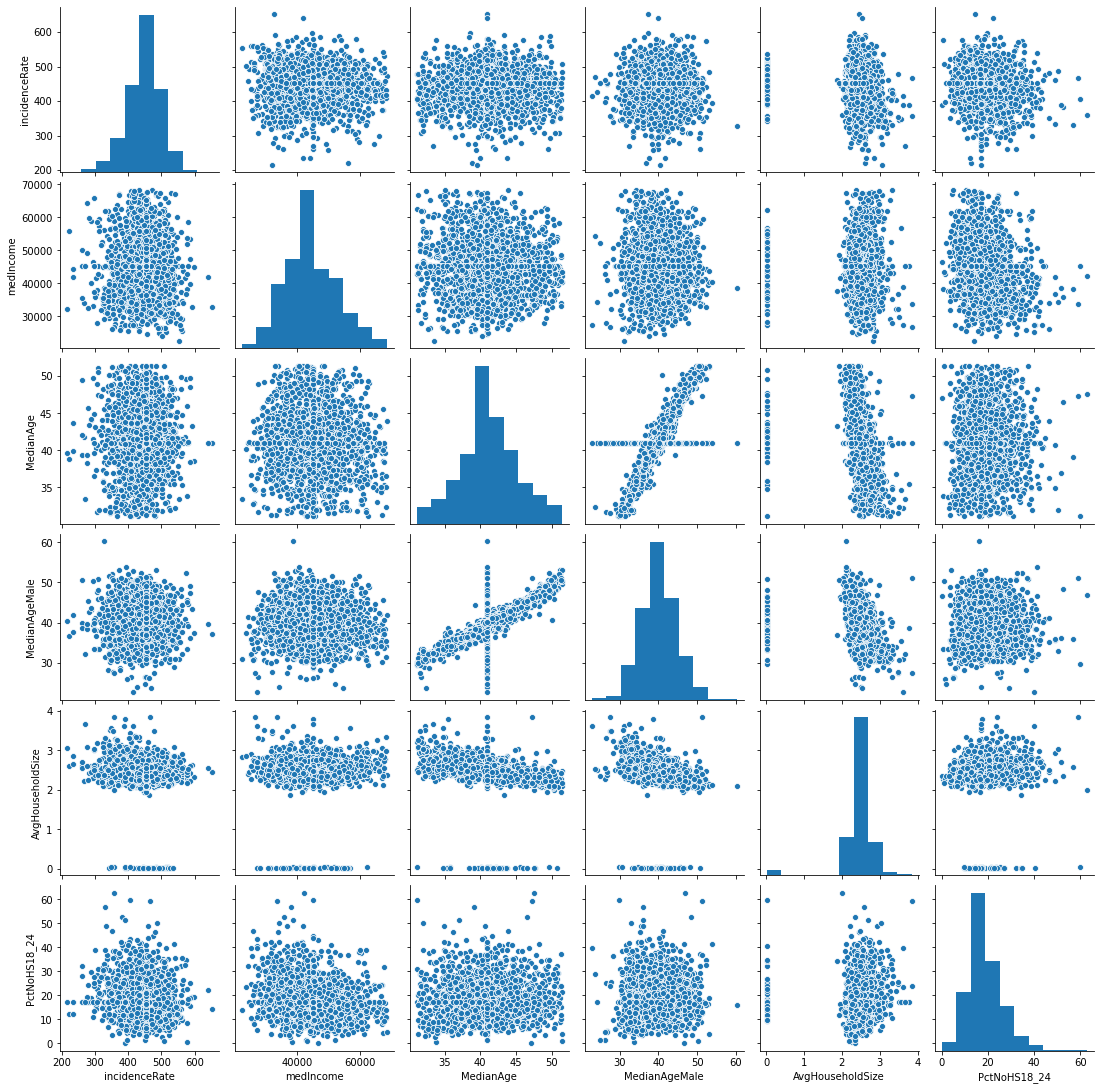

In [65]:
sns.pairplot(X[attributes], kind="scatter")
plt.show()

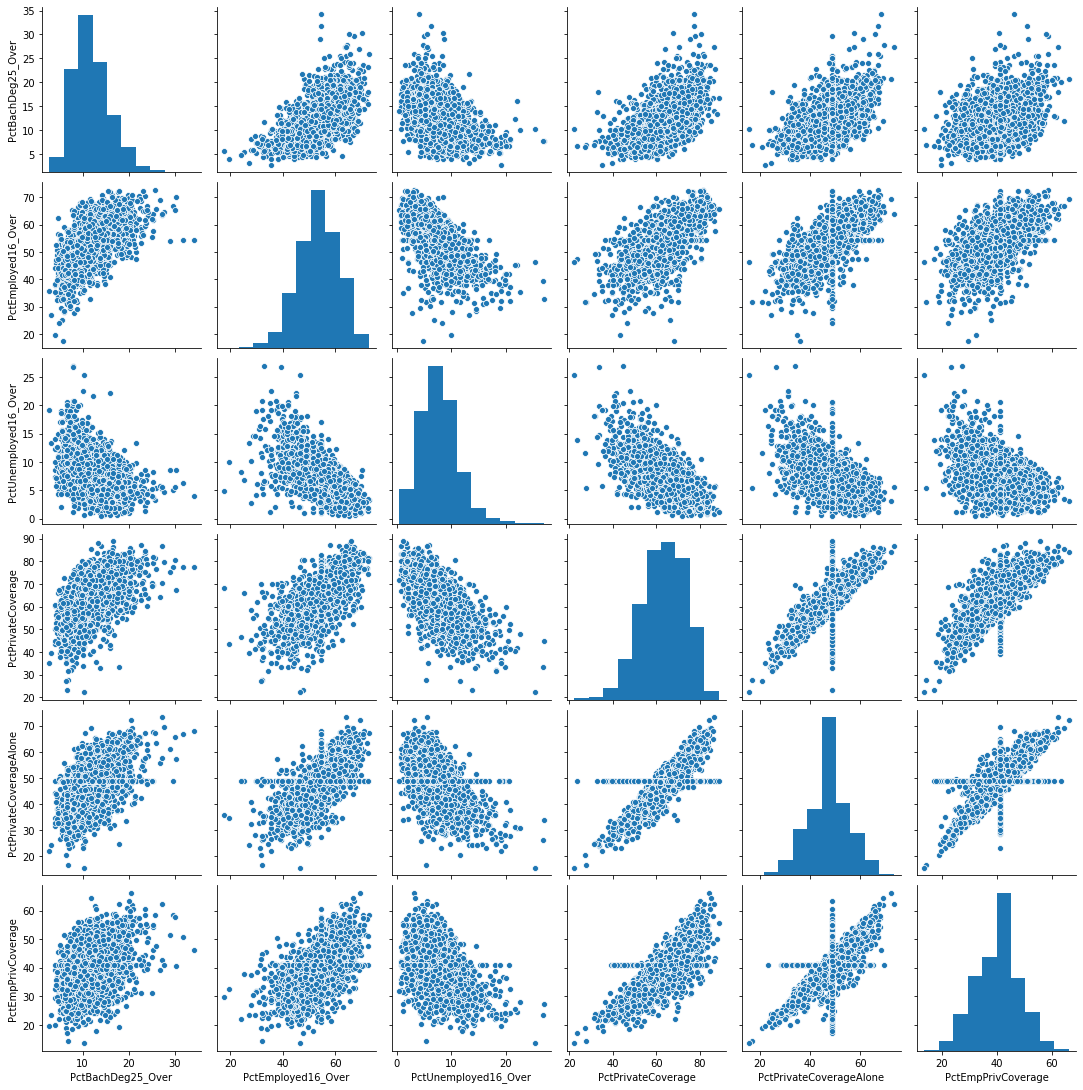

In [66]:
attributes2 = X.columns[10:16]
sns.pairplot(X[attributes2], kind="scatter")
plt.show()

### Splitting Dataset

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [68]:
X_train.shape

(1792, 22)

In [69]:
X_test.shape

(598, 22)

## 1. KNN Regressor

Text(0, 0.5, 'MSE')

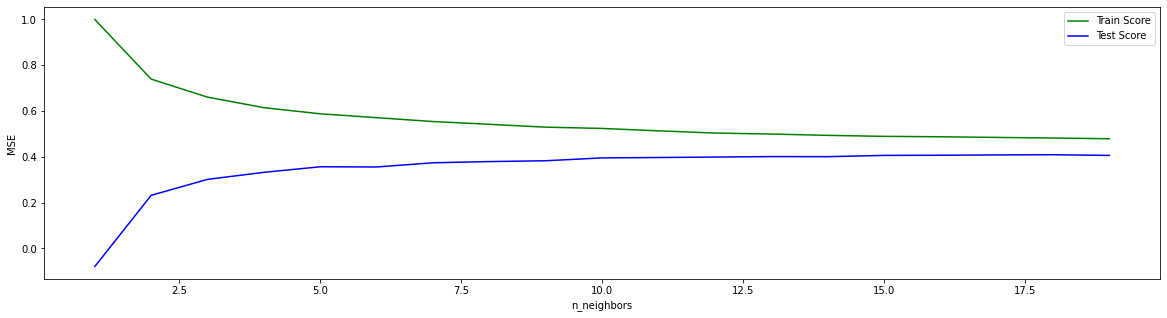

In [70]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

In [71]:
knn = KNeighborsRegressor(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.5242
Test score: 0.3954


In [72]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [73]:
from sklearn.metrics import r2_score, mean_squared_error
print("Train MSE =", mean_squared_error(y_train,y_pred_train))
print("Test MSE =", mean_squared_error(y_test,y_pred_test))

Train MSE = 314.54456796875
Test MSE = 381.5001357859531


In [74]:
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsRegressor()

In [75]:
neighbors = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
print("neighbors:\n{}".format(neighbors))

neighbors:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [76]:
grid_knn = GridSearchCV(knn_model, param_grid = neighbors, cv=10, return_train_score=True)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [77]:
df_knngrid = pd.DataFrame(grid_knn.cv_results_)
df_knngrid.loc[:,['params','mean_train_score','mean_test_score','rank_test_score']]

,params,mean_train_score,mean_test_score,rank_test_score
0,{'n_neighbors': 1},1.000000,-0.041129,20
1,{'n_neighbors': 2},0.741324,0.240901,19
2,{'n_neighbors': 3},0.659264,0.309768,18
3,{'n_neighbors': 4},0.615122,0.351897,17
4,{'n_neighbors': 5},0.587067,0.373331,16
5,{'n_neighbors': 6},0.568870,0.385156,15
6,{'n_neighbors': 7},0.552790,0.395422,14
7,{'n_neighbors': 8},0.539209,0.399539,13
8,{'n_neighbors': 9},0.528390,0.401286,12
9,{'n_neighbors': 10},0.518260,0.405146,10


**Test_rank_score in above table shows the best performing parameter values. As it can be seen in the table Sr No.14 has 1st rank which shows model with neighbors = 15 performs best while cross-validation.**

In [78]:
print("Best cross-validation accuracy: {:.2f}".format(grid_knn.best_score_))
print("Best parameters: {}".format(grid_knn.best_params_))
print("Train Score: {:.2f}".format(grid_knn.score(X_train, y_train)))
print("Test Score: {:.2f}".format(grid_knn.score(X_test,y_test)))

Best cross-validation accuracy: 0.42
Best parameters: {'n_neighbors': 15}
Train Score: 0.49
Test Score: 0.41


##  2. Linear Regression (using normal equation)

In [79]:
from scipy import stats
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.4726985300895302
0.42444242029243656


In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.50497137 0.42438914 0.42640333 0.44350986 0.44880011]
Average cross-validation score: 0.45


Text(0.5, 0, 'incidenceRate')

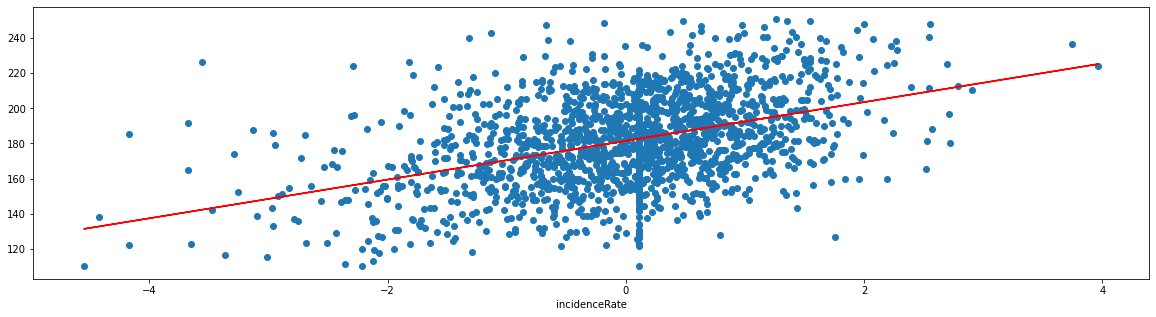

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,1].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('incidenceRate')

Text(0.5, 0, 'PctBachDeg25_Over')

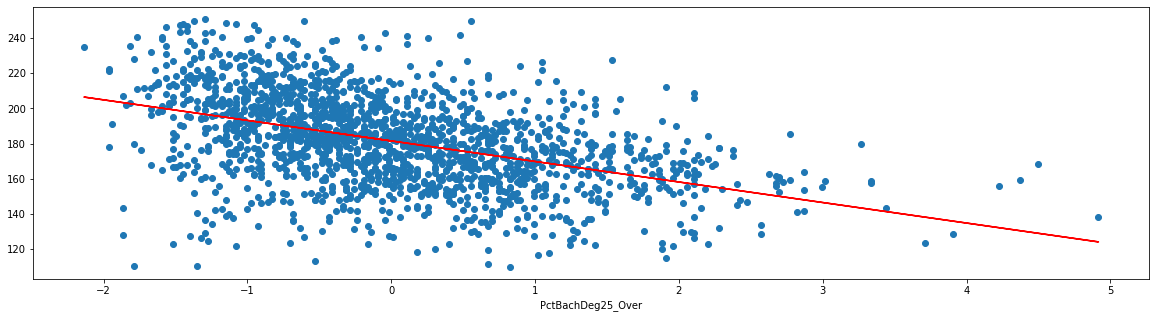

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,10].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('PctBachDeg25_Over')

### SGD Regressor

In [83]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100, learning_rate = 'constant', eta0 = 0.001, shuffle = False)
sgd_reg.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [84]:
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

0.4653805797213377
0.4163124631957695


## 3. Ridge Regession

In [85]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_para = {'alpha': [0.001,0.01,0.1,1.0,10,100,1000]}
print("Parameters:\n{}".format(ridge_para))

Parameters:
{'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}


In [86]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid=ridge_para, cv=5, return_train_score=True)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [87]:
df=pd.DataFrame(grid_ridge.cv_results_)
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [88]:
df.loc[:,['params','mean_train_score','mean_test_score','rank_test_score']]

,params,mean_train_score,mean_test_score,rank_test_score
0,{'alpha': 0.001},0.475143,0.449615,6
1,{'alpha': 0.01},0.475143,0.449615,5
2,{'alpha': 0.1},0.475143,0.449619,4
3,{'alpha': 1.0},0.475142,0.449654,3
4,{'alpha': 10},0.475107,0.449967,2
5,{'alpha': 100},0.473375,0.450940,1
6,{'alpha': 1000},0.438121,0.424334,7


In [89]:
print("Best cross-validation accuracy: {:.2f}".format(grid_ridge.best_score_))
print("Best parameters: {}".format(grid_ridge.best_params_))
print("Train Score: {:.2f}".format(grid_ridge.score(X_train, y_train)))
print("Test Score: {:.2f}".format(grid_ridge.score(X_test, y_test)))

Best cross-validation accuracy: 0.45
Best parameters: {'alpha': 100}
Train Score: 0.47
Test Score: 0.42


**Creating vizualization to understand effect of parameters.**

In [90]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

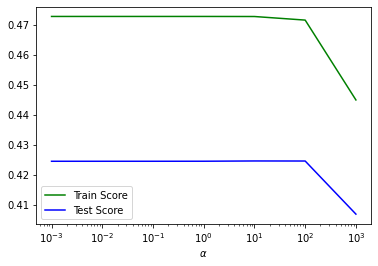

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

## 4. Lasso Regression

In [92]:
from  sklearn.linear_model import Lasso
lasso_para = {'alpha': [0.001,0.01,0.1,1.0,10,100,1000]}
print("Parameters:\n{}".format(lasso_para))

Parameters:
{'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}


In [93]:
grid_lasso = GridSearchCV(Lasso(), param_grid = lasso_para, cv=10, 
                          return_train_score=True)
grid_lasso.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [94]:
df_lasso=pd.DataFrame(grid_lasso.cv_results_)
df_lasso.loc[:,['params','mean_train_score','mean_test_score','rank_test_score']]

,params,mean_train_score,mean_test_score,rank_test_score
0,{'alpha': 0.001},0.473599,0.451429,3
1,{'alpha': 0.01},0.473587,0.451598,2
2,{'alpha': 0.1},0.472689,0.452675,1
3,{'alpha': 1.0},0.460151,0.445003,4
4,{'alpha': 10},0.084198,0.078411,5
5,{'alpha': 100},0.000000,-0.004333,6
6,{'alpha': 1000},0.000000,-0.004333,6


In [95]:
print("Best cross-validation accuracy: {:.2f}".format(grid_lasso.best_score_))
print("Best parameters: {}".format(grid_lasso.best_params_))
print("Train Set Score: {}".format(grid_lasso.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_lasso.score(X_test, y_test)))

Best cross-validation accuracy: 0.45
Best parameters: {'alpha': 0.1}
Train Set Score: 0.47175389634066417
Test Set Score: 0.42470119477918467


In [124]:
x_range = [0.001,0.01, 0.1, 1, 10, 1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

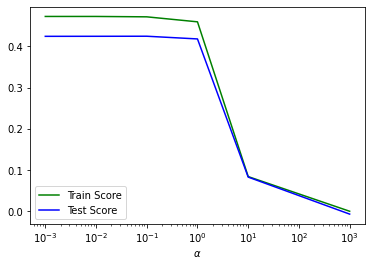

In [125]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

## 5. Polynomial Regression

In [96]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

print('Train Score:',poly_reg.score(X_train_poly, y_train))
print('Test Score:',poly_reg.score(X_test_poly, y_test))

Train Score: 0.6208239247700467
Test Score: 0.22245145135452668


In [97]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(poly_reg, X_train_poly, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-3.01665796  0.10923349  0.23421823  0.19965956  0.38533119]
Average cross-validation score: -0.42


Negative R2 score may represent that, the model is performing worse than a flat line.

## 6. Linear SVM

In [98]:
from sklearn.svm import LinearSVR
lsvm_para = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Parameters:\n{}".format(lsvm_para))

Parameters:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [99]:
grid_lsvm = GridSearchCV(LinearSVR(), param_grid = lsvm_para, cv=5, return_train_score=True)
grid_lsvm.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was e

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [100]:
print("Best parameters: {}".format(grid_lsvm.best_params_))
grid_lsvm_data = pd.DataFrame(grid_lsvm.cv_results_)
grid_lsvm_data[['params','mean_train_score','mean_test_score',
                               'rank_test_score']]

Best parameters: {'C': 10}


,params,mean_train_score,mean_test_score,rank_test_score
0,{'C': 0.001},-49.059980,-49.442524,7
1,{'C': 0.01},-42.264740,-42.683867,6
2,{'C': 0.1},-2.600161,-2.749081,5
3,{'C': 1},0.453174,0.430565,3
4,{'C': 10},0.465454,0.445572,1
5,{'C': 100},0.462144,0.438360,2
6,{'C': 1000},0.270354,0.253700,4


In [101]:
print("Best cross-validation accuracy: {:.2f}".format(grid_lsvm.best_score_))
print("Best parameters: {}".format(grid_lsvm.best_params_))
print("Train Score: {:.2f}".format(grid_lsvm.score(X_train, y_train)))
print("Test Score: {:.2f}".format(grid_lsvm.score(X_test, y_test)))

Best cross-validation accuracy: 0.45
Best parameters: {'C': 10}
Train Score: 0.46
Test Score: 0.41


## 7. SVM - Kernel : Poly

In [102]:
from sklearn.svm import SVR
polysvm_para = {'C': [0.01, 0.1, 1,10,100 ],'degree': [2,3,4]}
print("Parameters:\n{}".format(polysvm_para))

Parameters:
{'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4]}


In [103]:
from sklearn.model_selection import GridSearchCV
grid_polysvm = GridSearchCV(SVR(kernel = 'poly', gamma = 'auto'), param_grid = polysvm_para, 
                            cv=5, return_train_score=True)
grid_polysvm.fit(X_train, y_train)


/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was e

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [104]:
print("Best parameters: {}".format(grid_polysvm.best_params_))
grid_polysvm_data = pd.DataFrame(grid_polysvm.cv_results_)
grid_polysvm_data[['params','mean_train_score','mean_test_score','rank_test_score']]

Best parameters: {'C': 10, 'degree': 3}


,params,mean_train_score,mean_test_score,rank_test_score
0,"{'C': 0.01, 'degree': 2}",0.010149,0.007555,8
1,"{'C': 0.01, 'degree': 3}",0.051056,0.044566,7
2,"{'C': 0.01, 'degree': 4}",0.045152,-0.328433,10
3,"{'C': 0.1, 'degree': 2}",0.066283,0.054860,6
4,"{'C': 0.1, 'degree': 3}",0.180816,0.086263,5
5,"{'C': 0.1, 'degree': 4}",0.114523,-0.720158,11
6,"{'C': 1, 'degree': 2}",0.194565,0.137186,2
7,"{'C': 1, 'degree': 3}",0.380695,0.102984,4
8,"{'C': 1, 'degree': 4}",0.274261,-2.679457,14
9,"{'C': 10, 'degree': 2}",0.317399,0.106035,3


In [105]:
print("Best cross-validation accuracy: {:.2f}".format(grid_polysvm.best_score_))
print("Best parameters: {}".format(grid_polysvm.best_params_))
print("Train Score: {:.2f}".format(grid_polysvm.score(X_train, y_train)))
print("Test Score: {:.2f}".format(grid_polysvm.score(X_test, y_test)))

Best cross-validation accuracy: 0.25
Best parameters: {'C': 10, 'degree': 3}
Train Score: 0.55
Test Score: 0.22


## 8. SVM - Kernel : RBF

In [106]:
from sklearn.svm import SVR
rbf_para = {'C': [ 0.01, 0.1, 1, 10],'gamma': [ 0.01, 0.1, 1, 10]}
print("Parameters:\n{}".format(rbf_para))

Parameters:
{'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}


In [107]:
from sklearn.model_selection import GridSearchCV
grid_rbf = GridSearchCV(SVR(kernel = 'rbf'), param_grid = rbf_para, cv=5, 
                        return_train_score=True)
grid_rbf.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was e

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [108]:
print("Best parameters: {}".format(grid_rbf.best_params_))
grid_rbf_data = pd.DataFrame(grid_rbf.cv_results_)
grid_rbf_data[['params','mean_train_score','mean_test_score','rank_test_score']]

Best parameters: {'C': 10, 'gamma': 0.01}


,params,mean_train_score,mean_test_score,rank_test_score
0,"{'C': 0.01, 'gamma': 0.01}",0.018298,0.016993,7
1,"{'C': 0.01, 'gamma': 0.1}",0.011237,0.009506,9
2,"{'C': 0.01, 'gamma': 1}",0.000448,-0.001323,12
3,"{'C': 0.01, 'gamma': 10}",0.000427,-0.001343,13
4,"{'C': 0.1, 'gamma': 0.01}",0.139638,0.136420,5
5,"{'C': 0.1, 'gamma': 0.1}",0.094763,0.088323,6
6,"{'C': 0.1, 'gamma': 1}",0.006191,-0.001165,11
7,"{'C': 0.1, 'gamma': 10}",0.005989,-0.001362,14
8,"{'C': 1, 'gamma': 0.01}",0.414857,0.401936,2
9,"{'C': 1, 'gamma': 0.1}",0.333617,0.293108,4


In [110]:
print("Best cross-validation accuracy: {:.2f}".format(grid_rbf.best_score_))
print("Best parameters: {}".format(grid_rbf.best_params_))
print("Train Score: {:.2f}".format(grid_rbf.score(X_train, y_train)))
print("Test Score: {:.2f}".format(grid_rbf.score(X_test, y_test)))

Best cross-validation accuracy: 0.47
Best parameters: {'C': 10, 'gamma': 0.01}
Train Score: 0.51
Test Score: 0.47


## 9. SVM - Kernel : Linear

In [111]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_linkernel = GridSearchCV(SVR(kernel='linear',gamma = 'auto'),param_grid, cv=10, 
                              return_train_score=True)
grid_linkernel.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was e

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [1042]:
print("Best parameters: {}".format(grid_linkernel.best_params_))
df_linkernel = pd.DataFrame(grid_linkernel.cv_results_)
df_linkernel[['params','mean_train_score','mean_test_score','rank_test_score']]

Best parameters: {'C': 0.1}


,params,mean_train_score,mean_test_score,rank_test_score
0,{'C': 0.001},0.126452,0.122517,6
1,{'C': 0.01},0.380312,0.368879,5
2,{'C': 0.1},0.441601,0.424349,1
3,{'C': 1},0.441217,0.417529,2
4,{'C': 10},0.440294,0.414634,3
5,{'C': 100},0.440127,0.413324,4


In [112]:
print("Best cross-validation accuracy: {:.2f}".format(grid_linkernel.best_score_))
print("Best parameters: {}".format(grid_linkernel.best_params_))
print("Train Score: {:.2f}".format(grid_linkernel.score(X_train, y_train)))
print("Test Score: {:.2f}".format(grid_linkernel.score(X_test, y_test)))

Best cross-validation accuracy: 0.45
Best parameters: {'C': 0.1}
Train Score: 0.47
Test Score: 0.42


## 10. Decision Tree Regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
X_b = X_train[:50,3].reshape(-1,1)
y_b = y_train[:50]

treereg = DecisionTreeRegressor()
treereg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = treereg.predict(X_new)

In [115]:
param_grid = {'min_samples_leaf':[5,10,15,20,25,30],
              'min_samples_split':[5,10,15,20,25,30]}

In [116]:
grid_treereg = GridSearchCV(treereg, param_grid, cv=5, return_train_score=True)
grid_treereg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': [5, 10, 15, 20, 25, 30],
                         'min_samples_split': [5, 10, 15, 20, 25, 30]},
             

In [117]:
df_treereg = pd.DataFrame(grid_treereg.cv_results_)
df_treereg.loc[:,['params','mean_train_score','mean_test_score','rank_test_score']]

,params,mean_train_score,mean_test_score,rank_test_score
0,"{'min_samples_leaf': 5, 'min_samples_split': 5}",0.828240,0.141217,35
1,"{'min_samples_leaf': 5, 'min_samples_split': 10}",0.828240,0.141101,36
2,"{'min_samples_leaf': 5, 'min_samples_split': 15}",0.780356,0.178277,34
3,"{'min_samples_leaf': 5, 'min_samples_split': 20}",0.738762,0.201451,33
4,"{'min_samples_leaf': 5, 'min_samples_split': 25}",0.707502,0.217562,32
5,"{'min_samples_leaf': 5, 'min_samples_split': 30}",0.681542,0.233510,31
6,"{'min_samples_leaf': 10, 'min_samples_split': 5}",0.692776,0.252305,30
7,"{'min_samples_leaf': 10, 'min_samples_split': 10}",0.692776,0.252305,28
8,"{'min_samples_leaf': 10, 'min_samples_split': 15}",0.692776,0.252741,27
9,"{'min_samples_leaf': 10, 'min_samples_split': 20}",0.692776,0.252305,29


In [118]:
print("Best cross-validation accuracy: {:.2f}".format(grid_treereg.best_score_))
print("Best parameters: {}".format(grid_treereg.best_params_))
print("Train Score: {:.2f}".format(grid_treereg.score(X_train, y_train)))
print("Test Score: {:.2f}".format(grid_treereg.score(X_test, y_test)))

Best cross-validation accuracy: 0.35
Best parameters: {'min_samples_leaf': 30, 'min_samples_split': 5}
Train Score: 0.54
Test Score: 0.33


Text(0.5, 0, 'Median Age')

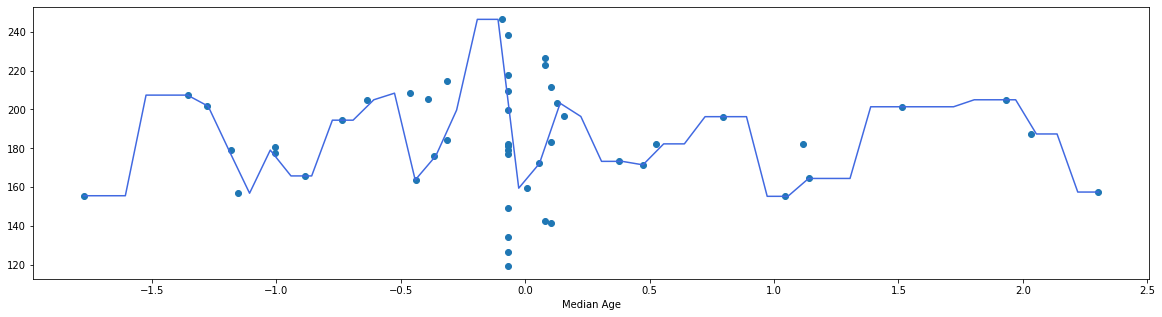

In [119]:
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('Median Age')

Text(0.5, 0, 'Median Age')

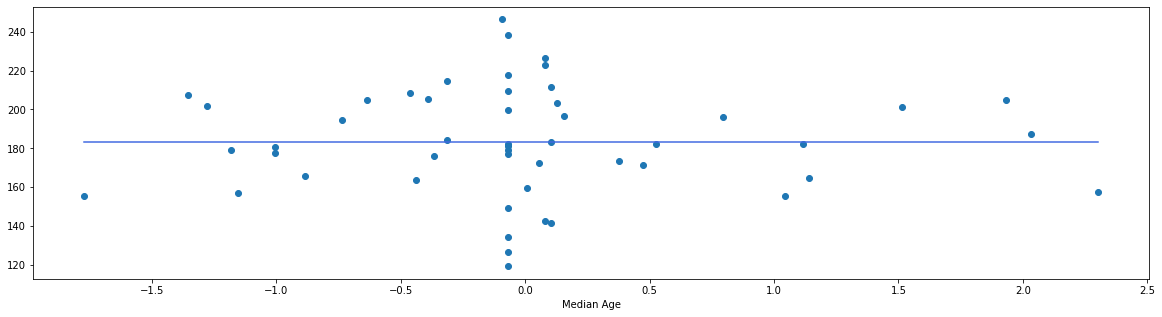

In [120]:
treereg = DecisionTreeRegressor(min_samples_split=5,min_samples_leaf=25)
treereg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = treereg.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('Median Age')

**Now, upon observing the results of all the models built above, SVM model with kernerl 'rbf' performs the best as it has the best cross validation score of 0.47 among all the models.**

**Hence, the model selected as best regressor will be *SVM- Kernel : rbf* with parameters *C=10 and gamma = 0.01.* We will now train the model on entire training dataset.**

## Best Regressor : SVM - Kernel : rbf

In [121]:
from sklearn.svm import SVR

best_regressor = SVR(kernel = 'rbf', C=10, gamma = 0.01)

best_regressor.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [122]:
best_regressor.score(X_test,y_test)

0.46764994056672976